# Object recognition in pytorch

Pytorch is our trusty counterpart to keras/tensorflow, and since both are in use in the world of **deep learning**, we'll let you have a go with pytorch as well!

We'll go through the steps pretty quickly, together!

## Examining the data

In [ ]:
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dog.npy -P ../assets/
!wget -N https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/cat.npy -P ../assets/

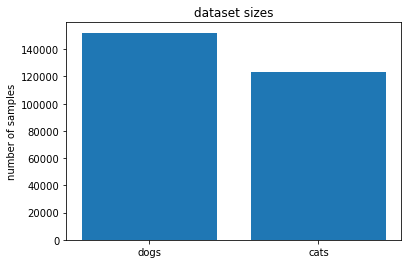

In [2]:
import numpy as np
from matplotlib import pyplot as plt
dogs = np.load("../assets/dog.npy")
cats = np.load("../assets/cat.npy")

plt.bar([0,1], [dogs.shape[0], cats.shape[0]])
plt.title('dataset sizes')
plt.xticks([0,1], ['dogs', 'cats'])
plt.ylabel('number of samples');

In [4]:
cats.shape

(123202, 784)

In [ ]:
def plot_raster(image):
    plt.imshow(image, cmap="gray")
    plt.axis('off')

dog_sample = dogs[0].reshape(28,28)
plot_raster(dog_sample)

In [ ]:
cat_sample = cats[1].reshape(28,28)
plot_raster(cat_sample)

In [ ]:
# balance datasets
max_samples = 20000
preprocessed_cats = cats[:max_samples].reshape(-1,28,28)
preprocessed_dogs = dogs[:max_samples].reshape(-1,28,28)

# Normalizing
preprocessed_cats = preprocessed_cats/255
preprocessed_dogs = preprocessed_dogs/255

plt.bar([0,1], [preprocessed_dogs.shape[0], preprocessed_cats.shape[0]])
plt.title('dataset sizes')
plt.xticks([0,1], ['dogs', 'cats'])
plt.ylabel('number of samples');

print(preprocessed_dogs[0])

## Preprocessing data for pytorch

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

data = np.concatenate((preprocessed_cats, preprocessed_dogs))
labels = np.concatenate((np.zeros(len(preprocessed_cats)), np.ones(len(preprocessed_dogs))))

# include number of channels for pytorch input (amount, channels, height, width)
data = np.expand_dims(data, axis=1)

# split data in train/val/test set
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    data, 
    labels,
    test_size=0.2, 
    random_state=42, 
    shuffle=True
)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_val_data, 
    train_val_labels,
    test_size=0.3, 
    random_state=42, 
    shuffle=True
)


In [ ]:
import torch

# We select the GPU if we have one, else the CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Primary device is {str(device).upper()}")

# pytorch requires data of tensor format, not ndarrays
train_data = torch.tensor(train_data, dtype=torch.float32)
val_data = torch.tensor(val_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

train_labels = torch.tensor(train_labels, dtype=torch.long)
val_labels = torch.tensor(val_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

## Composing and evaluating the model

The final model composed in the [keras object recognition example](./3.object_recognition_with_keras.ipynb) seems to perform pretty well, so let's just remake the structure from there!

You'll find the model structure a few cells below. This should give you all the information you need to be able to recreate it. Have a go at it!

We'll use a `ReLu()` in the Linear layers too, but we **ARE NOT** using `SoftMax()` in the last layer. We are just leaving it be, without any activation function.

In [ ]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # TO COMPLETE
        pass
    
    def forward(self, x):
        # TO COMPLETE
        pass

The model architecture should look like this when doing `print(model)`:

```
ConvNet(
  (act): ReLU()
  (convlayer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convlayer2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (denselayer1): Linear(in_features=1568, out_features=8, bias=True)
  (denselayer2): Linear(in_features=8, out_features=4, bias=True)
  (denselayer3): Linear(in_features=4, out_features=2, bias=True)
)
```

Like said above, we are **not using a `Softmax()` activation**.
Can you find out why ? 

*Hint: Take a closer look at [`nn.CrossEntropyLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)*

We are going to run the model for `2` epochs, because it is all that is needed.
We are going to `CrossEntropyLoss`, with the Adam optimizer and a `learning_rate` of `0.001` and a `batch_size` of `50`.

After initializing the `model`, don't forget to upload it to the device `device` using `model.to(device)`

In [ ]:
# TO COMPLETE



Now that we have defined the model, the optimizer and the criterion, let's setup the training and validation loop.
We have already defined the general structure of the training loop, you just have to complete the helper methods that we created.

In [ ]:
from typing import Tuple

def get_batch(data: torch.tensor, 
              labels : torch.tensor, 
              index : int, 
              batch_size: int, 
              total_step: int, 
              device : torch.device)-> Tuple[torch.tensor, torch.tensor]:
    """
    Get a batch of size `batch_size` at the given `index` of the 
    `data` and `labels`, then upload them to the `device`.
    
    
    Returns
    --------
    (torch.tensor, torch.tensor)
         - Images fed to the model
         - Labels of the images
    """
    
    # TO COMPLETE
    raise NotImplementedError()


def forward_pass(model : torch.nn.Module, 
                 criterion : torch.nn.CrossEntropyLoss, 
                 images : torch.tensor, 
                 labels : torch.tensor) -> Tuple[torch.tensor, torch.tensor]:
    """Pass the `images` through the `model` for the forward pass,
    and compute the loss between the predicted values and the `labels`
    using the defined `criterion`.
    
    Returns
    --------
    (torch.tensor, torch.tensor)
         - Prediction of the model
         - Loss
    """

    # TO COMPLETE
    raise NotImplementedError()


def backward_pass(optimizer : torch.optim.Optimizer, loss : torch.tensor) -> None:
    """
    Propagate the `loss` backward in the model and update the
    weights using the `optimizer`.
    """
    # TO COMPLETE
    raise NotImplementedError()


def compute_accuracy(output_data : torch.tensor, labels : torch.tensor) -> float:
    """
    Compute the accuracy between the predicted `output_data`
    and the true `labels`.
    
    Returns
    -------
    float
        Accuracy of the prediction
    """
    # TO COMPLETE
    raise NotImplementedError()


In [ ]:
# Train the model
total_step = len(train_data)
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []

model.train()

for epoch in range(num_epochs):
    ##### TRAINING LOOP #####
    for index in range(0, total_step, batch_size):
        images, labels = get_batch(train_data, train_labels, index, batch_size, total_step, device)
        
        # Run the forward pass
        output_data, loss = forward_pass(model, criterion, images, labels)
        train_loss_list.append(loss.item())

        backward_pass(optimizer, loss)

        # Track the accuracy
        accuracy = compute_accuracy(output_data, labels)
        train_acc_list.append(accuracy)
        
        # Print progress every `nb_batches` batches
        nb_batches = 100
        if index%(batch_size*nb_batches) == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}]," \
                    f"Step [{index + 1}/{total_step}]," \
                    f"Loss: {loss.item() :.4f}," \
                    f"Accuracy: {accuracy * 100 :.2f}%")
                          

    ##### VALIDATION LOOP #####
    epoch_val_acc_list = [] # Get the validation accuracy on a per epoch level
    epoch_val_loss_list = [] # Get the validation loss on a per epoch level

    for index in range(0, len(val_data), batch_size):
        images, labels = get_batch(val_data, val_labels, index, batch_size, total_step, device)

        output_data, loss = forward_pass(model, criterion, images, labels)
        val_loss_list.append(loss.item())
        epoch_val_loss_list.append(loss.item())
        
        # Track the accuracy
        accuracy = compute_accuracy(output_data, labels)
        val_acc_list.append(accuracy)
        epoch_val_acc_list.append(accuracy)
        
    print("VALIDATION SET: " \
             f"Loss: {np.mean(epoch_val_loss_list) :.4f}," \
            f"Accuracy: {np.mean(epoch_val_acc_list) :.2f}%" \
         )

Below, we defined some helper functions to plot the loss and accuracy, as well as the moving average of it, to reduce the noise in the data. You can adjust the `window` parameter to have the average be more or less smooth.

In [ ]:
from matplotlib import pyplot as plt

def moving_average(x, w): 
    """Compute the moving average of `x` in a window of `w`"""
    y_axis = np.convolve(x, np.ones(w), 'valid') / w
    
    # This is a hacky approach, do not use this in production
    x_axis = np.linspace(0, num_epochs, len(y_axis))
    return x_axis, y_axis

def plot_moving_average(train_list, val_list, epochs, ma_window, title):
    plt.figure()
    train_x_axis = np.linspace(0, epochs, len(train_list))
    val_x_axis = np.linspace(0, epochs, len(val_list))
    plt.plot(train_x_axis, train_list, label="Training set")
    plt.plot(val_x_axis, val_list, label="Validation set")

    avg_train_x, avg_train_y = moving_average(train_list, window)
    avg_val_x, avg_val_y = moving_average(val_list, window)

    plt.plot(avg_train_x, avg_train_y, label=f"Moving (train) average (w={window})")
    plt.plot(avg_val_x, avg_val_y,  label=f"Moving (val) average (w={window})")
    
    plt.xlabel('Epoch')
    plt.ylabel(title)
    plt.legend(loc='best')
    lower_limit = 0.7 if title == 'Accuracy' else 0 
    plt.ylim(lower_limit, 1)
    
window = 10 # Change the window to have a smoother curve
plot_moving_average(train_acc_list, val_acc_list, num_epochs, window, "Accuracy")
plot_moving_average(train_loss_list, val_loss_list, num_epochs, window, "Loss")

In [ ]:
#Evaluate the model on the test set




That final test score looks mighty fine, but that training curve looks so jittery! Can you guess why this is? Discuss with your colleagues! (hint: batch sizes)

In [ ]:
# Save the model in a `ckpt` file format


